In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df1 = pd.read_csv("previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
print(df1.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [11]:
df1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [12]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [13]:
df1.dropna(inplace=True)

Client Profile Analysis

In [14]:
df['INCOME_TO_DEBT_RATIO'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['INCOME_TO_DEBT_RATIO']

71        0.180430
124       0.776679
152       0.300000
161       0.614366
255       0.220760
            ...   
307358    0.311236
307359    0.146667
307407    0.366854
307456    0.350000
307482    0.449491
Name: INCOME_TO_DEBT_RATIO, Length: 8602, dtype: float64

In [15]:
demographic_analysis = df.groupby('CODE_GENDER')['TARGET'].mean()  #
print("Default rates across different demographic groups:")
print(demographic_analysis)

Default rates across different demographic groups:
CODE_GENDER
F    0.053068
M    0.068934
Name: TARGET, dtype: float64


In [16]:
education_analysis = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()  # Assuming 'EDUCATION_LEVEL' is a column in your dataset
employment_analysis = df.groupby('OCCUPATION_TYPE')['TARGET'].mean()  # Assuming 'EMPLOYMENT_STATUS' is a column in your dataset
print("\nDefault rates based on educational level:")
print(education_analysis)
print("\nDefault rates based on employment status:")
print(employment_analysis)


Default rates based on educational level:
NAME_EDUCATION_TYPE
Academic degree                  0.000000
Higher education                 0.045132
Incomplete higher                0.056122
Lower secondary                  0.085714
Secondary / secondary special    0.073612
Name: TARGET, dtype: float64

Default rates based on employment status:
OCCUPATION_TYPE
Accountants              0.035651
Cleaning staff           0.065217
Cooking staff            0.061224
Core staff               0.040309
Drivers                  0.076596
HR staff                 0.035714
High skill tech staff    0.051780
IT staff                 0.068182
Laborers                 0.078800
Low-skill Laborers       0.090909
Managers                 0.049032
Medicine staff           0.046083
Private service staff    0.039216
Realty agents            0.073171
Sales staff              0.076030
Secretaries              0.022727
Security staff           0.087719
Waiters/barmen staff     0.103448
Name: TARGET, dtype: float6

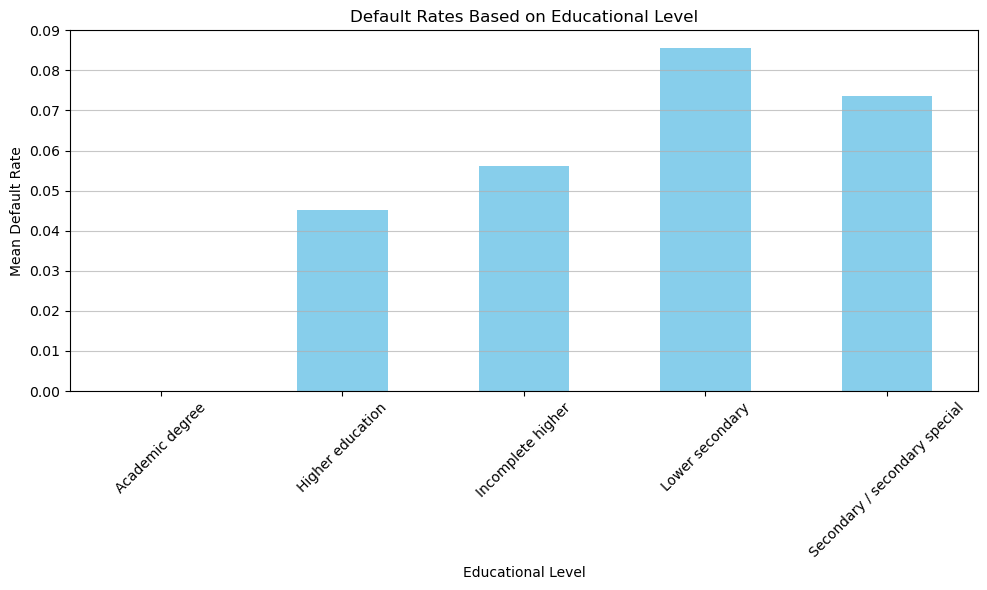

In [18]:
plt.figure(figsize=(10, 6))
education_analysis.plot(kind='bar', color='skyblue')
plt.title('Default Rates Based on Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Mean Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

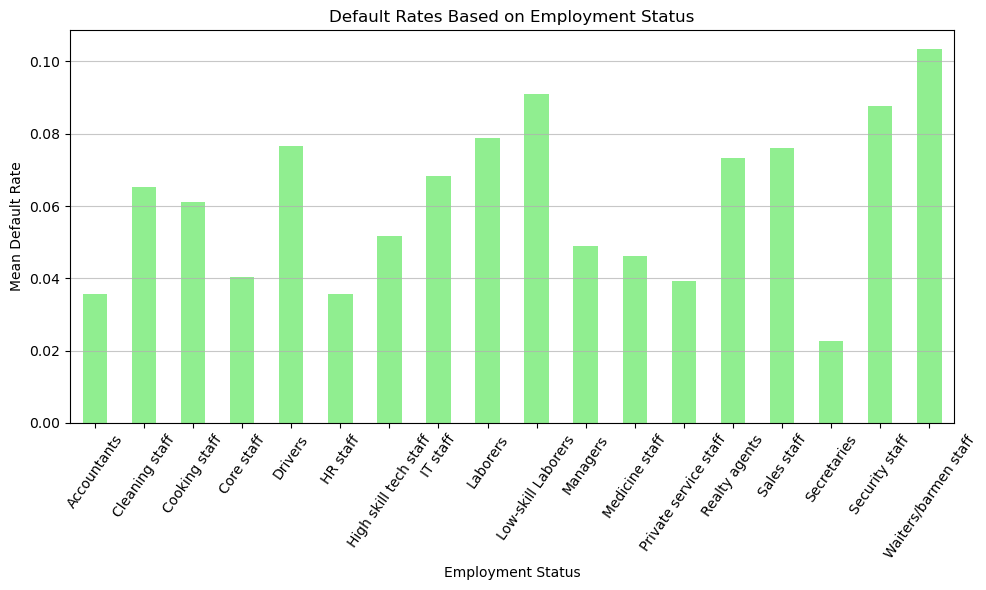

In [19]:
plt.figure(figsize=(10, 6))
employment_analysis.plot(kind='bar', color='lightgreen')
plt.title('Default Rates Based on Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Mean Default Rate')
plt.xticks(rotation=55)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


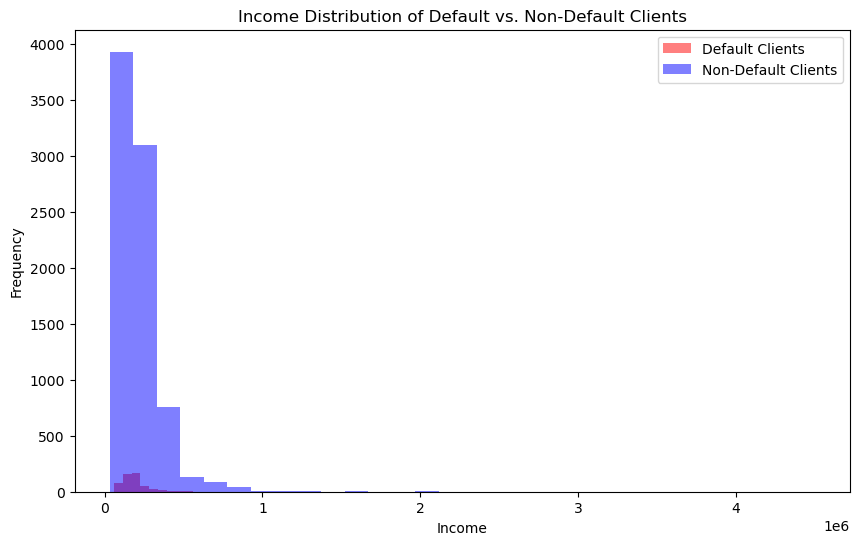

In [22]:
default_clients = df[df['TARGET'] == 1] 
non_default_clients = df[df['TARGET'] == 0] 
plt.figure(figsize=(10, 6))
plt.hist(default_clients['AMT_INCOME_TOTAL'], bins=20, alpha=0.5, color='red', label='Default Clients')
plt.hist(non_default_clients['AMT_INCOME_TOTAL'], bins=30, alpha=0.5, color='blue', label='Non-Default Clients')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution of Default vs. Non-Default Clients')
plt.legend()
plt.show()

Financial Analysis

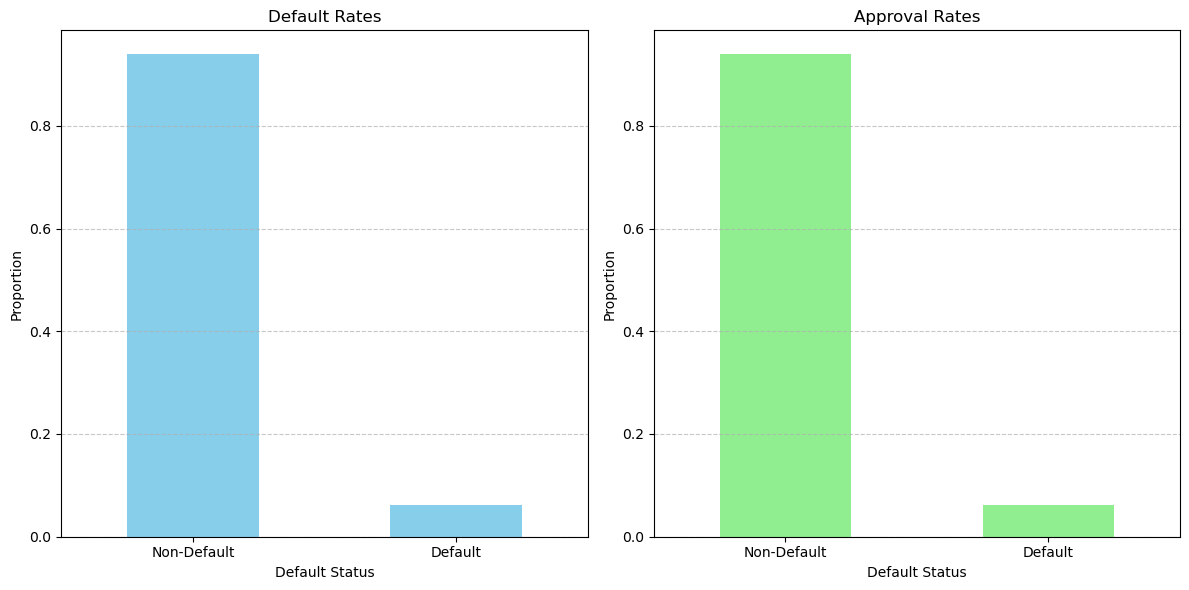

In [24]:
default_rates = df.groupby('TARGET')['SK_ID_CURR'].count() / len(df)
approval_rates = df.groupby('TARGET')['TARGET'].count() / len(df)
plt.figure(figsize=(12, 6))

# Default rates
plt.subplot(1, 2, 1)
default_rates.plot(kind='bar', color='skyblue')
plt.title('Default Rates')
plt.xlabel('Default Status')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Approval rates
plt.subplot(1, 2, 2)
approval_rates.plot(kind='bar', color='lightgreen')
plt.title('Approval Rates')
plt.xlabel('Default Status')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

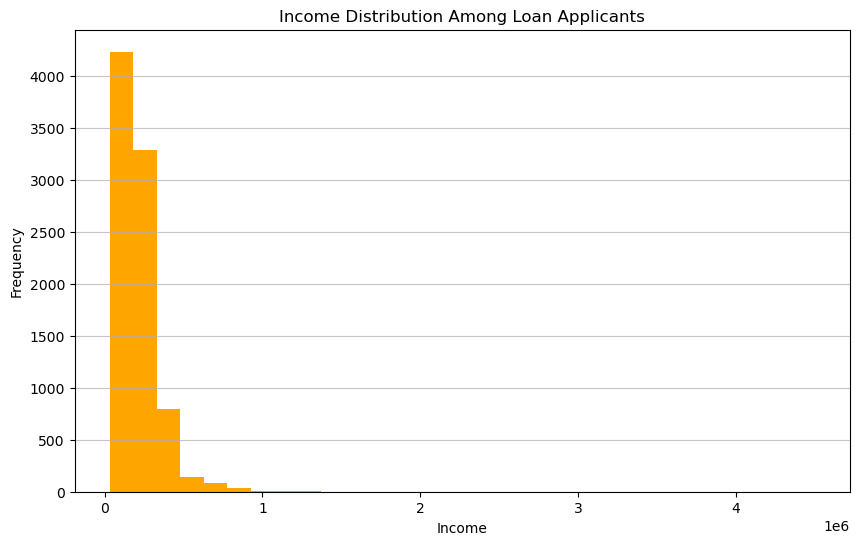

In [25]:
# Income distribution among loan applicants
plt.figure(figsize=(10, 6))
df['AMT_INCOME_TOTAL'].plot(kind='hist', bins=30, color='orange')
plt.title('Income Distribution Among Loan Applicants')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

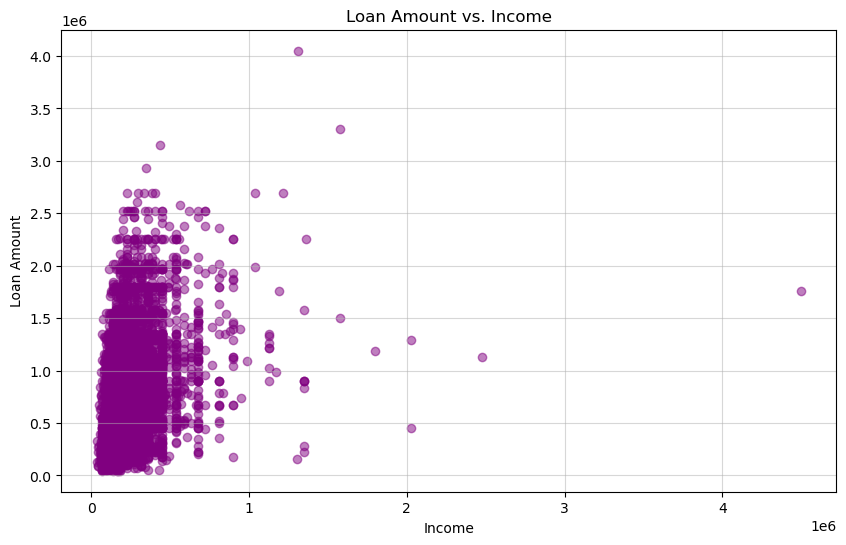

In [26]:
# Relationship between loan amount and income
plt.figure(figsize=(10, 6))
plt.scatter(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'], color='purple', alpha=0.5)
plt.title('Loan Amount vs. Income')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.grid(axis='both', alpha=0.5)
plt.show()

Credit History Analysis

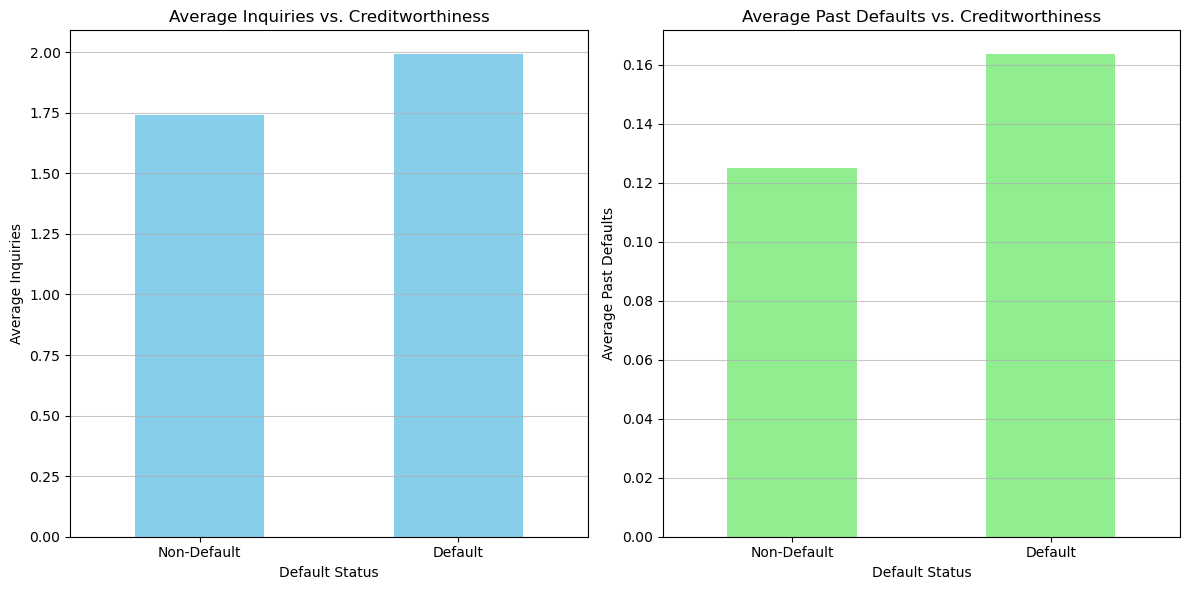

In [27]:
# Relationship between number of inquiries and past defaults
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_YEAR'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Inquiries vs. Creditworthiness')
plt.xlabel('Default Status')
plt.ylabel('Average Inquiries')
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0)
plt.grid(axis='y', alpha=0.7)

# Past defaults vs. creditworthiness
plt.subplot(1, 2, 2)
df.groupby('TARGET')['DEF_30_CNT_SOCIAL_CIRCLE'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Past Defaults vs. Creditworthiness')
plt.xlabel('Default Status')
plt.ylabel('Average Past Defaults')
plt.xticks([0, 1], ['Non-Default', 'Default'], rotation=0)
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

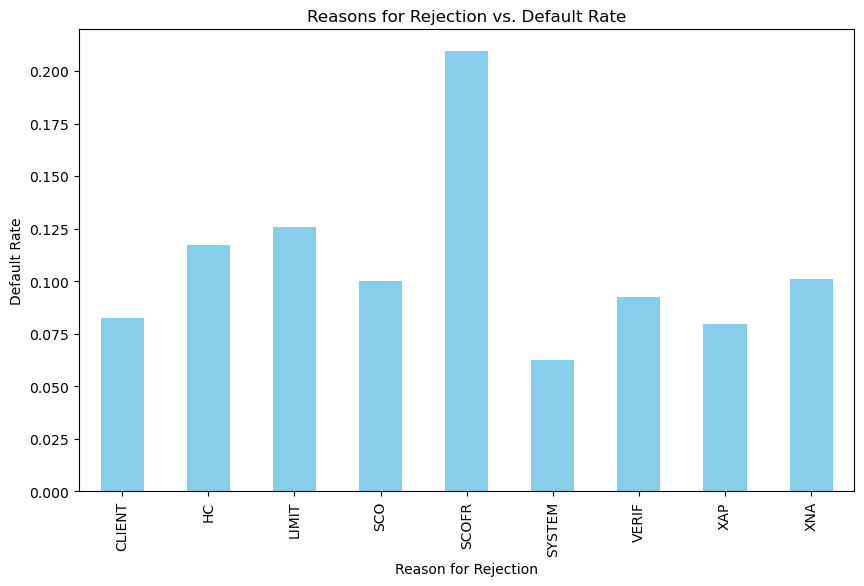

In [41]:
# Relationships between credit risk and reasons for rejection
merged_df = pd.merge(df, df1, on='SK_ID_CURR') 
rejection_df = merged_df.groupby('CODE_REJECT_REASON')['TARGET'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
rejection_df.plot(kind='bar', color='skyblue')
plt.title('Reasons for Rejection vs. Default Rate')
plt.xlabel('Reason for Rejection')
plt.ylabel('Default Rate')
plt.show()

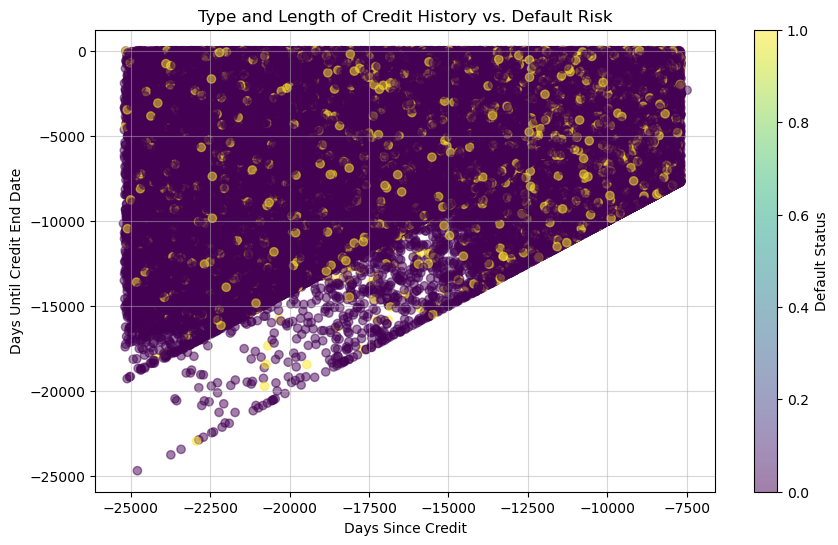

In [33]:
# Relationship between type and length of credit history and default risk
plt.figure(figsize=(10, 6))
plt.scatter(df['DAYS_BIRTH'], df['DAYS_REGISTRATION'], c=df['TARGET'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Default Status')
plt.title('Type and Length of Credit History vs. Default Risk')
plt.xlabel('Days Since Credit')
plt.ylabel('Days Until Credit End Date')
plt.grid(axis='both', alpha=0.5)
plt.show()

Loan Application Decisions Analysis

C:\Users\Josep\AppData\Local\Temp\ipykernel_11360\4215799724.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)
C:\Users\Josep\AppData\Local\Temp\ipykernel_11360\4215799724.py:36: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)


<Figure size 1200x800 with 0 Axes>

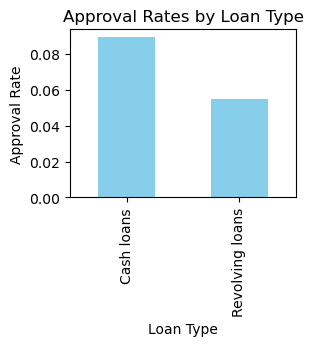

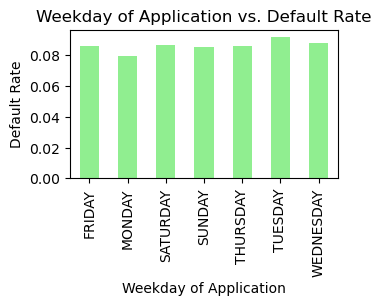

In [57]:
loan_type_analysis = merged_df.groupby(['NAME_CONTRACT_TYPE_x', 'NAME_CASH_LOAN_PURPOSE'])['TARGET'].mean()

# Approval Rates Analysis
approval_rate_analysis = merged_df.groupby('NAME_CONTRACT_TYPE_x')['TARGET'].mean()

# Previous Application Outcomes Analysis
previous_outcomes_analysis = merged_df.groupby(['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_STATUS'])['TARGET'].mean()

# Correlation with Application Timing
weekday_analysis = merged_df.groupby(['WEEKDAY_APPR_PROCESS_START_x'])['TARGET'].mean()
hour_analysis = merged_df.groupby(['HOUR_APPR_PROCESS_START_x'])['TARGET'].mean()

# Plotting the results
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 2, 1)
plt.subplot(2, 2, 1)
loan_type_analysis.unstack().plot(kind='bar', stacked=True)
plt.title('Loan Type and Purpose vs. Default Rate')
plt.xlabel('Loan Type and Purpose')
plt.ylabel('Default Rate')

plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 2, 2)
approval_rate_analysis.plot(kind='bar', color='skyblue')
plt.title('Approval Rates by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Approval Rate')

plt.subplot(2, 2, 3)
ax2 = plt.subplot(2, 2, 3)
previous_outcomes_analysis.unstack().plot(kind='bar', stacked=True)
plt.title('Previous Application Outcomes vs. Default Rate')
plt.xlabel('Previous Application Outcomes')
plt.ylabel('Default Rate')

plt.subplot(2, 2, 4)
weekday_analysis.plot(kind='bar', color='lightgreen')
plt.title('Weekday of Application vs. Default Rate')
plt.xlabel('Weekday of Application')
plt.ylabel('Default Rate')

ax1.remove()
ax2.remove()
plt.tight_layout()
plt.show()

In [19]:
# Assuming you have loaded and preprocessed your data, and you have selected features and split the data into training and testing sets

# Define selected features and split the data into features (X) and target variable (y)
selected_features = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
    'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
    'WEEKDAY_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE'
]

# Filter the DataFrame to include only selected features
df_selected = df[selected_features]

# Define numerical and categorical features
numerical_features = df_selected.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_selected.select_dtypes(include=['object']).columns

# Impute missing values for numerical features using SimpleImputer
from sklearn.impute import SimpleImputer
imputer_numeric = SimpleImputer(strategy='mean')
X_train[numerical_features] = imputer_numeric.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer_numeric.transform(X_test[numerical_features])

# Encode categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Concatenate encoded categorical features with numerical features
import scipy.sparse as sp
X_train_final = sp.hstack((X_train_encoded, X_train[numerical_features]))
X_test_final = sp.hstack((X_test_encoded, X_test[numerical_features]))


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_final, y_train)
accuracy = model.score(X_test_final, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9453805926786751


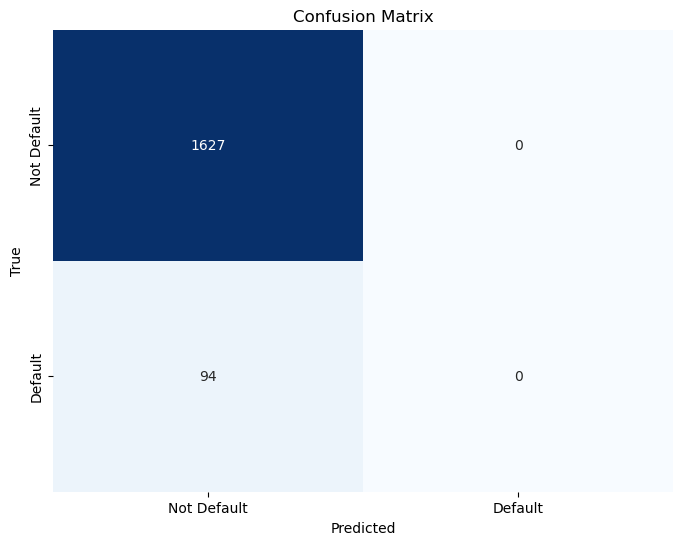

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_final)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()